## Einlesen von Daten


In [1]:
import numpy as np

with open ('Measurements/kalorimeter/mix.txt','r') as myfile:
    data=myfile.read().replace(',','.').replace('\n',',').replace('	',',')

datarray = data.split(',')
array = np.array([float(i) for i in datarray[:-1]])

In [3]:
with open ('Measurements/kalorimeter/hotwater.txt','r') as myfile:
    data=myfile.read().replace(',','.').replace('\n',',').replace('	',',')

hotarray = data.split(',')
hotwater = np.array([float(i) for i in hotarray[:-1]])


In [5]:
with open ('Measurements/kalorimeter/icewater','r') as myfile:
    data=myfile.read().replace(',','.').replace('\n',',').replace('	',',')

coldarray = data.split(',')
icewater = np.array([float(i) for i in coldarray[:-1]])

## Plotten von Daten

Die Zeit unserer Mischtemperatur betraegt mathematisch entweder 1.9579758659372164 -0.07020235395331535
Der naechste Wert an t_m1 ist 1.9375


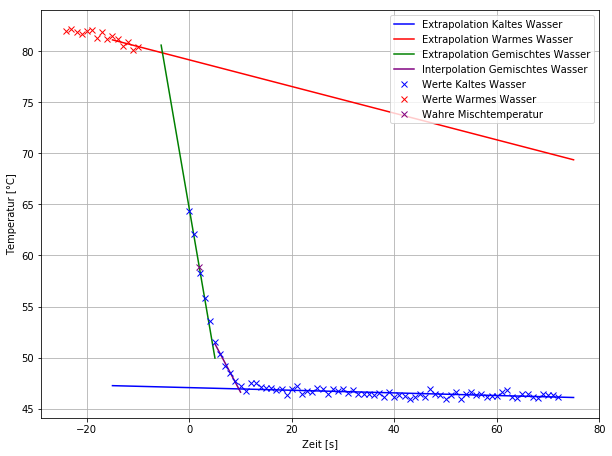

Unsere Mischungstemperatur ist 58.88715026780611


In [17]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

t_in=array[10::2]-array[10]
T=array[11::2]

a_m,b_m,c_m=np.polyfit(t_in[:12],T[:12],2)
x_polyfit=np.linspace(-4,12,25)
T_polyfit=a_m*(x_polyfit**2)+b_m*x_polyfit+c_m

x=np.linspace(-15,75,250)

a_l,b_l=np.polyfit(t_in[13:],T[13:],1)
l_fit=a_l*x+b_l

t_in2=hotwater[0::2]-hotwater[0]
T2=hotwater[1::2]
t_in2_=t_in2-t_in2[-1]-10

a_h,b_h=np.polyfit(t_in2_,T2,1)
h_fit=a_h*x+b_h

a_m1,b_m1=np.polyfit(t_in[:4],T[:4],1)
x_m1=np.linspace(-5.5,5,25)
T_m1=a_m1*x_m1+b_m1

a_m2,b_m2=np.polyfit(t_in[5:10],T[5:10],1)
x_m2=np.linspace(5,10,25)
T_m2=a_m2*x_m2+b_m2

plt.plot(x,l_fit,label='Extrapolation Kaltes Wasser',color="blue")
plt.plot(x,h_fit,label='Extrapolation Warmes Wasser',color="red")
plt.plot(x_m1,T_m1,label='Extrapolation Gemischtes Wasser',color="green")
plt.plot(x_m2,T_m2,label='Interpolation Gemischtes Wasser',color="purple")
plt.plot(t_in,T,'x',label='Werte Kaltes Wasser',color="blue")
plt.plot(t_in2_,T2,'x',label='Werte Warmes Wasser',color="red")
plt.grid()
plt.ylabel('Temperatur [°C]')
plt.xlabel('Zeit [s]')
t_1=t_in[5]
t_2=(b_m2-b_l)/(a_l-a_m2)
T_m2int=(a_m2/2)*(t_2**2-t_1**2)+b_m2*(t_2-t_1)
T_lint=(a_l/2)*(t_2**2-t_1**2)+b_l*(t_2-t_1)
F_add=T_m2int-T_lint
t_0=(b_m1-b_h)/(a_h-a_m1)

A=a_l/2-a_h/2
B=b_l-b_h
C=a_m*(t_1**2)/2+b_m*t_1-a_l*(t_1**2)/2-b_l*t_1+F_add+a_h*(t_0**2)/2+b_h*t_0-(a_m/2)*t_0**2-b_m*t_0

t_m1=(-B+np.sqrt(B**2-4*A*C))/2*A
t_m2=(-B-np.sqrt(B**2-4*A*C))/2*A
print('Die Zeit unserer Mischtemperatur betraegt mathematisch entweder',t_m1,t_m2)

print('Der naechste Wert an t_m1 ist',x_m1[17])

T_m1v=T_m1[17]
#T_m2v=T_m1[13]

plt.plot(t_m1,T_m1v,'x',label='Wahre Mischtemperatur',color="purple")
#plt.plot(t_m2,T_m2v,'x',label='2. "Wahre" Mischtemperatur',color="orange")
fig_size=plt.rcParams["figure.figsize"]
fig_size[0]=10
fig_size[1]=7.5
plt.rcParams["figure.figsize"]=fig_size
plt.legend(loc=1)
plt.savefig(fname='/home/a/Documents/uni/AP1/git/c/Praktikum-A1/31/Graph_Mix_Kali.png',dpi=300)
plt.show()
print('Unsere Mischungstemperatur ist',T_m1v)